<a href="https://colab.research.google.com/github/ingcarlosleon/techsprint/blob/main/Caso_de_Uso.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Planteamiento del problema
¿Cómo podemos mejorar la identificación de brechas en infraestructuras y desarrollo en la planificación de inversiones públicas y privadas para apoyar la resiliencia climática, la igualdad de género, la buena gobernanza y el desarrollo sostenible?

https://idb-air-techsprint.vercel.app/problem-statements/planteamiento-del-problema-4

Propuesta de Cruzamiento de Información:

Análisis de Gasto Público vs. Necesidades de Infraestructura: Comparar el gasto público en infraestructura (de MOF Jamaica) con las necesidades de desarrollo identificadas a través de datos socioeconómicos y ambientales (Data.gov.jm y Datos.gob.ar).

Identificación de Brechas Geoespaciales: Utilizar los datos geoespaciales de IDERA y Data.gov.jm para mapear regiones con brechas significativas en infraestructura. Relacionar estas brechas con indicadores de resiliencia climática y equidad de género.

Comparación y Evaluación de Directrices de Inversión: Comparar las directrices de planificación de infraestructura de PRIF NIIP con las inversiones actuales en Jamaica y Argentina para identificar áreas donde las inversiones podrían mejorar la resiliencia climática y la igualdad de género.

Evaluación de Impacto en la Equidad: Cruzar el Índice de Inequidades en la Primera Infancia con los planes de inversión en infraestructura para asegurar que las inversiones apoyen la reducción de inequidades desde la infancia.

In [2]:
!pip install pandas requests frictionless

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 414.1/414.1 kB 7.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.4/532.4 kB 21.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.1/42.1 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 2.7 MB/s eta 0:00:00
  Created wheel for petl: filename=petl-1.7.15-py3-none-any.whl size=230719 sha256=a62554bff613ea87dabca40ad03cb7a4f666d8460ca83973b242a9f1ee1e3bba
  Stored in directory: /root/.cache/pip/wheels/25/98/91/62fbf9f9cb32952d7d91532152b893f7eab007f6aea750a3f5
  Created wheel for stringcase: filename=stringcase-1.2.0-py3-none-any.whl size=3569 sha256=56588af065d98fb538e46fc0bc2badd4f6d595705d9266ed51dfab2570bd87be
  Stored in dir

In [3]:
import pandas as pd
import requests
from io import StringIO

# URLs de los datasets desde el JSON
url_spatial_data_works = "https://air.portaljs.com/opendata/ARG/MAPAINVDB/OPENDATA/OBRAS/CSV/2024/06/19/dataset_mop.csv"
url_investment_projects = "https://air.portaljs.com/opendata/ARG/MAPAINVDB/OPENDATA/PROYECTOS/CSV/2024/06/19/dataset_proyectosmop.csv"
url_datos_espaciales = "https://air.portaljs.com/opendata/ARG/MAPAINVDB/OPENDATA/DATOS_ESPACIALES/CSV/2024/06/25/dataset_geojson.csv"

# Función para cargar los datasets desde la URL
def load_csv_from_url(url):
    response = requests.get(url)
    response.raise_for_status()  # Asegúrate de que la solicitud fue exitosa
    data = response.content.decode('utf-8')
    return pd.read_csv(StringIO(data))

# Cargar los datasets en DataFrames de pandas
df_spatial_data_works = load_csv_from_url(url_spatial_data_works)
df_investment_projects = load_csv_from_url(url_investment_projects)
df_datos_espaciales = load_csv_from_url(url_datos_espaciales)

# Mostrar las primeras filas de cada DataFrame
# print("Spatial Data Works")
# print(df_spatial_data_works.head())
# print("\nInvestment Projects")
# print(df_investment_projects.head())
# print("\nDatos Espaciales")
# print(df_datos_espaciales.head())


# Analisis Exploratorio de Datos
**Realizaremos análisis de las columnas existentes y validación de datos perdidos contestando las siguientes preguntas:**

¿Hay valores faltantes en el conjunto de datos?

¿Se pueden identificar patrones de ausencia?

¿Cuáles son las estadísticas resumidas del conjunto de datos?

¿Hay valores atípicos en el conjunto de datos?

¿Cuál es la cardinalidad de las variables categóricas?

¿Existen distribuciones sesgadas en el conjunto de datos?

¿Necesitamos aplicar alguna transformación no lineal?

¿Se identifican tendencias temporales? (En caso de que el conjunto incluya una dimensión de tiempo).

¿Hay correlación entre las variables dependientes e independientes?

¿Cómo se distribuyen los datos en función de diferentes categorías?

¿Existen patrones o agrupaciones (clusters) en los datos con características similares?

¿Hay desequilibrio en las clases de la variable objetivo?



###Datos espaciales - Obras de la República Argentina	spatial-data-works **Milton**

In [4]:

# Obtener información general sobre el DataFrame
df_spatial_data_works.info()

print("Spatial Data Works - Describe")
df_spatial_data_works.describe()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7317 entries, 0 to 7316
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   idproyecto                      7317 non-null   int64  
 1   numeroobra                      7317 non-null   object 
 2   codigobapin                     7317 non-null   object 
 3   fechainicioanio                 7317 non-null   int64  
 4   fechafinanio                    7317 non-null   int64  
 5   nombreobra                      7317 non-null   object 
 6   descripicionfisica              7317 non-null   object 
 7   montototal                      7317 non-null   float64
 8   sectornombre                    7317 non-null   object 
 9   avancefinanciero                7317 non-null   float64
 10  avancefisico                    7317 non-null   float64
 11  entidadejecutoranombre          7317 non-null   object 
 12  duracionobrasdias               73

,idproyecto,fechainicioanio,fechafinanio,montototal,avancefinanciero,avancefisico,duracionobrasdias,codigo_bahra,organismo_financiador_prestamo
count,7.317000e+03,7317.000000,7317.000000,7.317000e+03,7317.000000,7317.000000,7317.000000,3.977000e+03,2.100000e+02
mean,7.230890e+08,2021.288916,2022.269373,5.918530e+08,71.909481,74.819638,351.468908,2.927189e+14,7.117020e+07
std,4.488914e+08,1.604703,1.181463,3.175574e+09,33.753074,35.889589,491.368452,3.037337e+14,5.210177e+08
min,1.610000e+03,2008.000000,2020.000000,1.000000e+00,0.000000,0.000000,1.000000,2.007000e+03,2.280000e+03
25%,1.001445e+07,2021.000000,2021.000000,1.154832e+07,45.170000,48.920000,120.000000,6.294029e+13,2.940000e+03
50%,1.003112e+09,2021.000000,2022.000000,3.604513e+07,90.000000,100.000000,181.000000,1.410527e+14,8.945000e+03
75%,1.003120e+09,2022.000000,2023.000000,1.637773e+08,100.000000,100.000000,386.000000,5.404902e+14,8.945000e+03
max,1.003131e+09,2024.000000,2029.000000,9.408170e+10,100.000000,100.000000,5568.000000,9.401400e+14,4.312100e+09


In [5]:
#Verificamos si existen valores faltantes en nuestro conjunto
print("¿Hay valores faltantes en el conjunto de datos?")
if (df_spatial_data_works.isna().values.any())==True:
  print("Sí")
else:
  print("No")

¿Hay valores faltantes en el conjunto de datos?
Sí


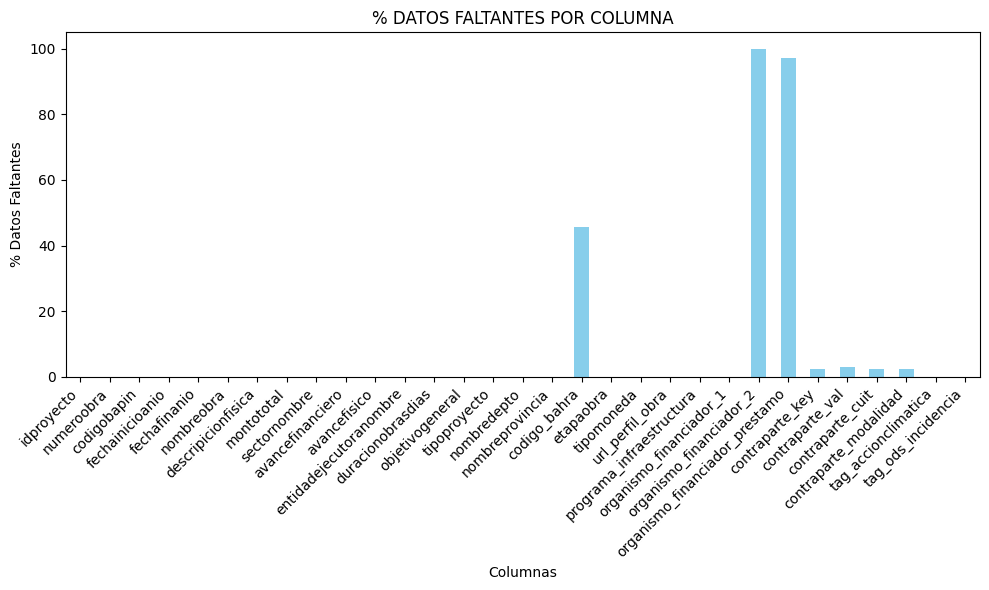

In [6]:
#Graficamos el porcentaje de datos faltantes por cada columna del conjunto
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import math
import numpy as np
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


columnas_valor_faltante = df_spatial_data_works.isnull().mean() * 100

plt.figure(figsize=(10, 6))
columnas_valor_faltante.plot(kind='bar', color='skyblue')
plt.title('% DATOS FALTANTES POR COLUMNA')
plt.xlabel('Columnas')
plt.ylabel('% Datos Faltantes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

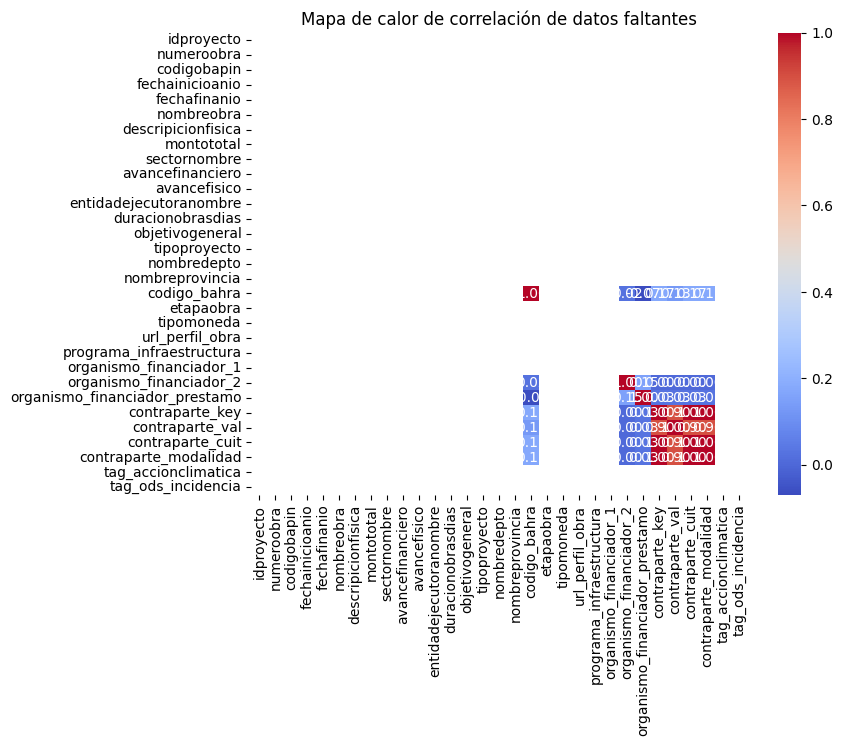

In [7]:
#A continuación, validamos si existe algún patrón de ausencia en los datos

#Generamos la matriz de correlación de datos faltantes en el conjunto
Correlacion_Faltantes = df_spatial_data_works.isnull().corr()

# Crear el mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(Correlacion_Faltantes, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Mapa de calor de correlación de datos faltantes')
plt.show()

Mapa de calor de la matriz de correlación de datos faltantes. Este tipo de gráfico muestra cómo los valores faltantes (o nulos) en diferentes columnas de un conjunto de datos están correlacionados entre sí. A continuación, te explico los elementos clave de la gráfica:

Ejes:

En el eje horizontal y vertical se listan las variables o columnas del conjunto de datos.
La intersección de una variable con otra (o consigo misma) muestra la correlación de los datos faltantes entre esas dos variables.
Colores:

El color de las celdas indica el grado de correlación. La escala de colores va desde el rojo (correlación positiva) hasta el azul (correlación negativa).
El color rojo oscuro indica una alta correlación positiva, lo que significa que cuando faltan datos en una variable, es muy probable que también falten datos en la otra variable correlacionada.
El color azul oscuro indica una alta correlación negativa, lo que sugiere que si una variable tiene datos faltantes, es poco probable que la otra variable correlacionada tenga datos faltantes.
Colores más claros (cercanos al blanco) indican poca o ninguna correlación.
Interpretación de la gráfica:

Las celdas rojas (cercanas a 1.0) muestran pares de variables que tienden a tener valores faltantes juntos.
Las celdas azules muestran pares de variables que tienden a no tener valores faltantes al mismo tiempo.
Los valores numéricos dentro de las celdas indican la fuerza exacta de la correlación.

###Proyectos de Inversión de la República Argentina - **Carlos Leon**

In [ ]:

# Obtener información general sobre el DataFrame
df_investment_projects.info()

print("XXX")
df_investment_projects.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630 entries, 0 to 629
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   IdProyecto          630 non-null    int64  
 1   CodigoBapin         630 non-null    int64  
 2   NombreProyecto      630 non-null    object 
 3   Sector              630 non-null    object 
 4   Subsector           630 non-null    object 
 5   Tipo                630 non-null    object 
 6   CostoEstimado       630 non-null    float64
 7   FechaEstimacion     630 non-null    object 
 8   Responsable         630 non-null    object 
 9   Plan                630 non-null    object 
 10  Objetivo            133 non-null    object 
 11  Descripcion         630 non-null    object 
 12  NombreProvincia     630 non-null    object 
 13  NombreDepartamento  630 non-null    object 
 14  FechaCargueArchivo  630 non-null    object 
 15  FuenteDatos         630 non-null    object 
 16  url_perf

,IdProyecto,CodigoBapin,CostoEstimado
count,6.300000e+02,6.300000e+02,6.300000e+02
mean,1.001582e+09,1.328730e+05,1.085870e+09
std,3.956680e+07,4.460835e+04,8.926337e+09
min,1.003941e+07,0.000000e+00,2.775273e+06
25%,1.003151e+09,1.284070e+05,3.841979e+07
50%,1.003159e+09,1.363185e+05,7.500000e+07
75%,1.003170e+09,1.389670e+05,4.160132e+08
max,1.003176e+09,1.132632e+06,1.925820e+11


In [ ]:

# Obtener información general sobre el DataFrame
df_spatial_data_works.info()

# Resumen estadístico de las columnas numéricas
df_datos_espaciales.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7317 entries, 0 to 7316
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   idproyecto                      7317 non-null   int64  
 1   numeroobra                      7317 non-null   object 
 2   codigobapin                     7317 non-null   object 
 3   fechainicioanio                 7317 non-null   int64  
 4   fechafinanio                    7317 non-null   int64  
 5   nombreobra                      7317 non-null   object 
 6   descripicionfisica              7317 non-null   object 
 7   montototal                      7317 non-null   float64
 8   sectornombre                    7317 non-null   object 
 9   avancefinanciero                7317 non-null   float64
 10  avancefisico                    7317 non-null   float64
 11  entidadejecutoranombre          7317 non-null   object 
 12  duracionobrasdias               73

,IdVisorMapas,IdProyecto,Descripcion,ConsecutivoCarga
count,6996.000000,6.996000e+03,0.0,6996.0
mean,421801.500000,7.042445e+08,NaN,1.0
std,2019.715574,4.565424e+08,NaN,0.0
min,418304.000000,1.659500e+04,NaN,1.0
25%,420052.750000,1.001438e+07,NaN,1.0
50%,421801.500000,1.003112e+09,NaN,1.0
75%,423550.250000,1.003117e+09,NaN,1.0
max,425299.000000,1.003129e+09,NaN,1.0
